In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
from feature_selection import forward_select, backward_select, rf_select

### Splitting data

In [2]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


In [3]:

def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(55,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


def train_ann(X_train, y_train, X_test, y_test, sampling_technique):

    # model = KerasClassifier(build_fn=ann, epochs=10)
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    # model.fit(X_train, y_train, epochs=30, batch_size=32,class_weight=class_weights)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred)*100,2)
    Precision = round(precision_score(y_test, y_pred)*100,2)
    f1 = round(f1_score(y_test, y_pred)*100,2)
    accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)




Epoch 1/30


386/386 [==============================] - 1s 1ms/step - loss: 0.2338 - accuracy: 0.9411
Epoch 2/30
386/386 [==============================] - 0s 958us/step - loss: 0.2004 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 0s 940us/step - loss: 0.1946 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 0s 956us/step - loss: 0.1917 - accuracy: 0.9412
Epoch 5/30
386/386 [==============================] - 0s 940us/step - loss: 0.1904 - accuracy: 0.9412
Epoch 6/30
386/386 [==============================] - 0s 961us/step - loss: 0.1893 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 0s 945us/step - loss: 0.1879 - accuracy: 0.9413
Epoch 8/30
386/386 [==============================] - 0s 938us/step - loss: 0.1876 - accuracy: 0.9413
Epoch 9/30
386/386 [==============================] - 0s 945us/step - loss: 0.1862 - accuracy: 0.9412
Epoch 10/30
386/386 [==============================] - 0s 951us/step - loss: 0.1

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

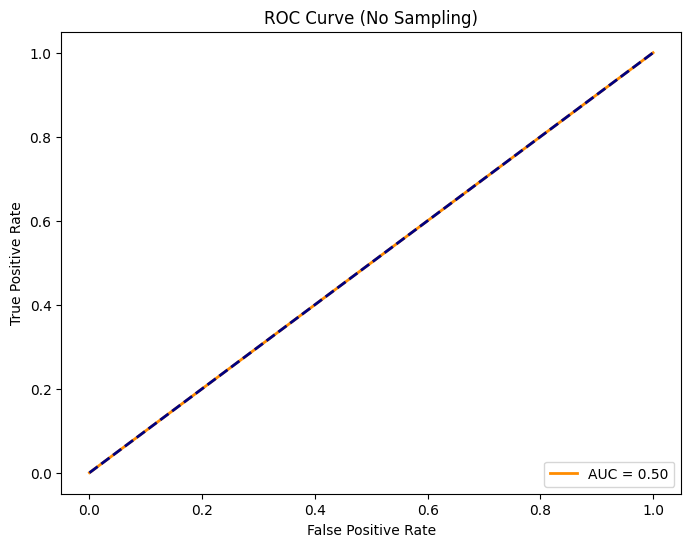

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7271
Epoch 2/30
726/726 [==============================] - 1s 957us/step - loss: 0.4431 - accuracy: 0.7941
Epoch 3/30
726/726 [==============================] - 1s 946us/step - loss: 0.4100 - accuracy: 0.8127
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3873 - accuracy: 0.8273
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3707 - accuracy: 0.8381
Epoch 6/30
726/726 [==============================] - 1s 979us/step - loss: 0.3589 - accuracy: 0.8435
Epoch 7/30
726/726 [==============================] - 1s 943us/step - loss: 0.3499 - accuracy: 0.8501
Epoch 8/30
726/726 [==============================] - 1s 938us/step - loss: 0.3433 - accuracy: 0.8529
Epoch 9/30
726/726 [==============================] - 1s 938us/step - loss: 0.3371 - accuracy: 0.8551
Epoch 10/30
726/726 [==============================] - 1s 942us/step - loss: 0.3317 - accuracy: 0.8

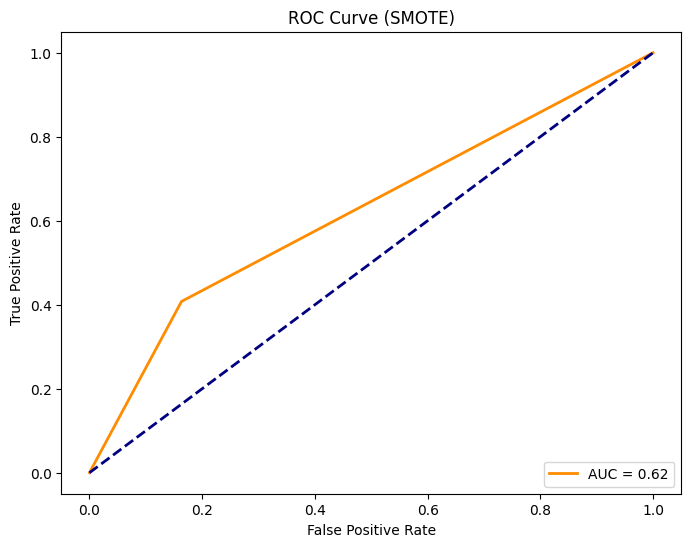

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 992us/step - loss: 0.5745 - accuracy: 0.7108
Epoch 2/30
726/726 [==============================] - 1s 972us/step - loss: 0.4827 - accuracy: 0.7741
Epoch 3/30
726/726 [==============================] - 1s 970us/step - loss: 0.4525 - accuracy: 0.7927
Epoch 4/30
726/726 [==============================] - 1s 975us/step - loss: 0.4325 - accuracy: 0.8030
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4174 - accuracy: 0.8102
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4059 - accuracy: 0.8164
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3969 - accuracy: 0.8221
Epoch 8/30
726/726 [==============================] - 1s 979us/step - loss: 0.3890 - accuracy: 0.8287
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3825 - accuracy: 0.8290
Epoch 10/30
726/726 [==============================] - 1s 982us/step - loss: 0.3774 - accuracy: 0.834

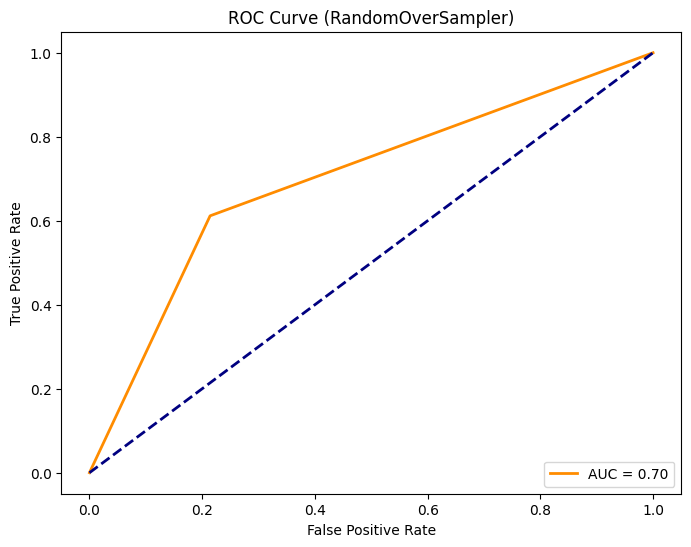

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 0s 1ms/step - loss: 0.7304 - accuracy: 0.5497
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.6347
Epoch 3/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6056 - accuracy: 0.6892
Epoch 4/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.7286
Epoch 5/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.7396
Epoch 6/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5329 - accuracy: 0.7514
Epoch 7/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7583
Epoch 8/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5042 - accuracy: 0.7659
Epoch 9/30
46/46 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.7721
Epoch 10/30
46/46 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7762
Epoch 11/30
46/46 [===========

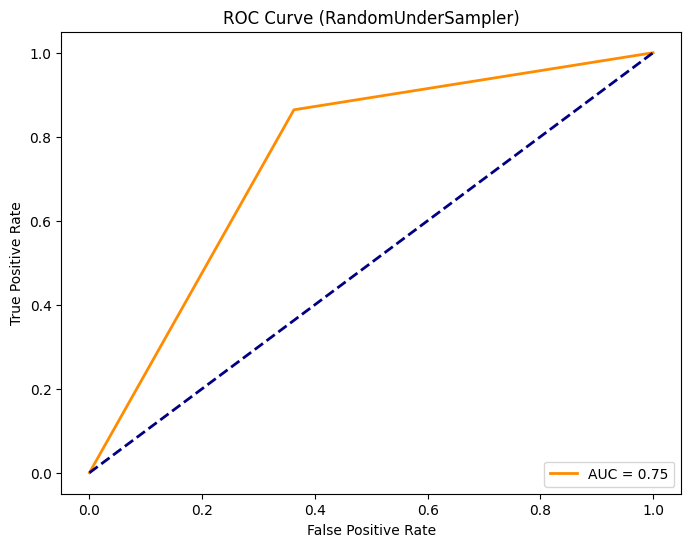

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


337/337 [==============================] - 1s 976us/step - loss: 0.3069 - accuracy: 0.9014
Epoch 2/30
337/337 [==============================] - 0s 958us/step - loss: 0.2127 - accuracy: 0.9320
Epoch 3/30
337/337 [==============================] - 0s 946us/step - loss: 0.1975 - accuracy: 0.9324
Epoch 4/30
337/337 [==============================] - 0s 973us/step - loss: 0.1898 - accuracy: 0.9323
Epoch 5/30
337/337 [==============================] - 0s 988us/step - loss: 0.1846 - accuracy: 0.9326
Epoch 6/30
337/337 [==============================] - 0s 976us/step - loss: 0.1812 - accuracy: 0.9328
Epoch 7/30
337/337 [==============================] - 0s 982us/step - loss: 0.1780 - accuracy: 0.9331
Epoch 8/30
337/337 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.9346
Epoch 9/30
337/337 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9347
Epoch 10/30
337/337 [==============================] - 0s 979us/step - loss: 0.1712 - accuracy: 0

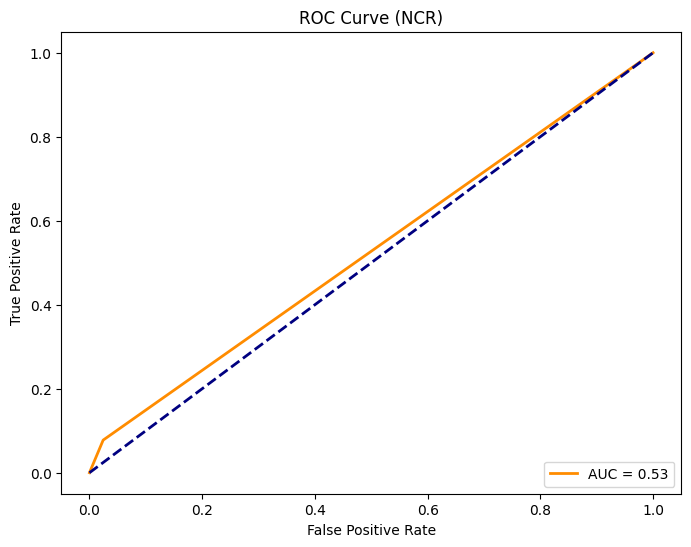

In [4]:
results = {}
scaler = StandardScaler()
#No Sampling
metrics = train_ann(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote, y_smote = smote(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_smote, X_test_scaled, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

# ros = RandomOverSampler(random_state=42)
# X_over, y_over = ros.fit_resample(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_over, X_test_scaled, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]


# rus = RandomUnderSampler(random_state=42)
# X_under, y_under = rus.fit_resample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_under)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_under, X_test_scaled, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

# X_ncr, y_ncr = ncr(X_train, y_train)
# metrics = train_ann(X_ncr, y_ncr, X_test, y_test,'NCR')
# results[metrics[0]] = metrics[1:]
X_ncr, y_ncr = ncr(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_ncr)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_ncr, X_test_scaled, y_test,'NCR')
results[metrics[0]] = metrics[1:]

In [5]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision',  'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,86.41,14.57,24.93,65.24
RandomOverSampler,61.17,16.98,26.58,77.43
SMOTE,40.78,15.16,22.11,80.80
NCR,7.77,18.60,10.96,91.57
No Sampling,0.00,0.00,0.00,93.32


```Feature Selection```

In [ ]:
model= KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)

for_features = forward_select(model, X_train, y_train)

back_features = backward_select(model, X_train, y_train)

rf_features = rf_select(X_train, y_train)

print("Best forward select features: " + for_features)
print("Best back select features: " +)
print("Best rf select features: " +rf_features)

```Hyper-Parameter Tuning```

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score


# Create a KerasClassifier for use in GridSearchCV
model = KerasClassifier(build_fn=ann, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001,0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30,40],  # Number of training epochs
    'dropout_rate': [0.0, 0.1,0.2],
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_over, y_over)

# Print the best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Err

Best: 0.947810 using {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 30, 'hidden_units': 32, 'learning_rate': 0.01, 'optimizer': 'adam'}


In [7]:

def train_ann(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

    # model = KerasClassifier(build_fn=ann, epochs=10)
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='sigmoid', 
                            dropout_rate=0.0, 
                            hidden_units=8, learning_rate=0.1, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train, class_weight=class_weights)
    # model.fit(X_train, y_train, epochs=30, batch_size=32,class_weight=class_weights)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred)*100,2)
    Precision = round(precision_score(y_test, y_pred)*100,2)
    f1 = round(f1_score(y_test, y_pred)*100,2)
    accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


386/386 [==============================] - 1s 1ms/step - loss: 0.3696 - accuracy: 0.8825
Epoch 2/30
386/386 [==============================] - 0s 992us/step - loss: 0.2306 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 0s 966us/step - loss: 0.2237 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 0s 989us/step - loss: 0.2225 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 0s 974us/step - loss: 0.2207 - accuracy: 0.9413
Epoch 6/30
386/386 [==============================] - 0s 987us/step - loss: 0.2144 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 0s 982us/step - loss: 0.2080 - accuracy: 0.9413
Epoch 8/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2035 - accuracy: 0.9413
Epoch 9/30
386/386 [==============================] - 0s 990us/step - loss: 0.1998 - accuracy: 0.9413
Epoch 10/30
386/386 [==============================] - 0s 990us/step - loss: 0.1969 - accuracy: 0

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

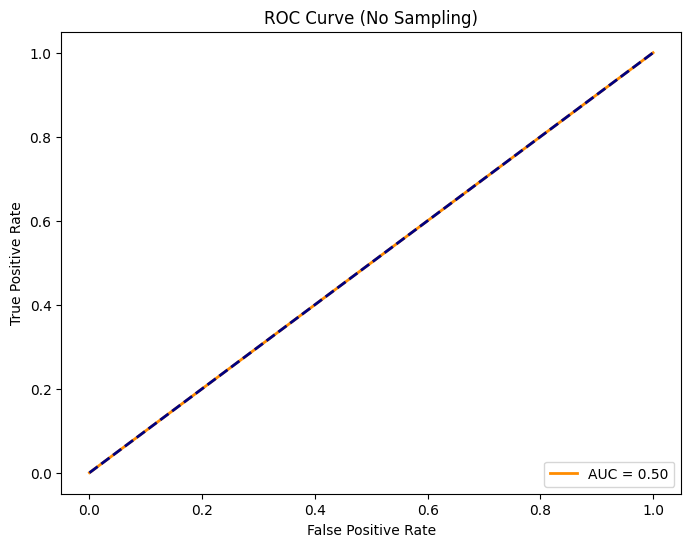

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
726/726 [==============================] - 1s 1ms/step - loss: 0.6165 - accuracy: 0.6890
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5198 - accuracy: 0.7591
Epoch 3/30
726/726 [==============================] - 1s 996us/step - loss: 0.4983 - accuracy: 0.7662
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4862 - accuracy: 0.7708
Epoch 5/30
726/726 [==============================] - 1s 992us/step - loss: 0.4754 - accuracy: 0.7743
Epoch 6/30
726/726 [==============================] - 1s 996us/step - loss: 0.4652 - accuracy: 0.7793
Epoch 7/30
726/726 [==============================] - 1s 990us/step - loss: 0.4557 - accuracy: 0.7840
Epoch 8/30
726/726 [==============================] - 1s 993us/step - loss: 0.4477 - accuracy: 0.7909
Epoch 9/30
726/726 [==============================] - 1s 993us/step - loss: 0.4408 - accuracy: 0.7948
Epoch 10/30
726/726 [==============================] - 1s 979us/step - loss: 0.4350 - ac

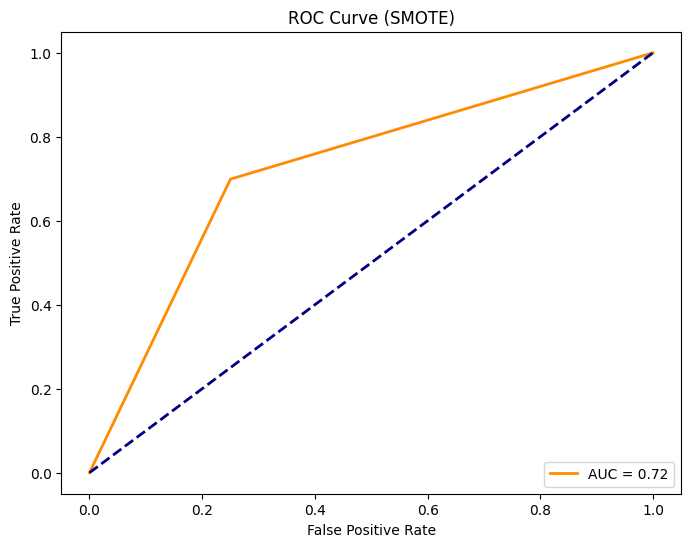

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.5881 - accuracy: 0.7017
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5217 - accuracy: 0.7478
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5051 - accuracy: 0.7571
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4950 - accuracy: 0.7630
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4869 - accuracy: 0.7675
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4795 - accuracy: 0.7731
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4725 - accuracy: 0.7767
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4662 - accuracy: 0.7799
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4606 - accuracy: 0.7845
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4555 - accuracy: 0.7855
Epoch 11/3

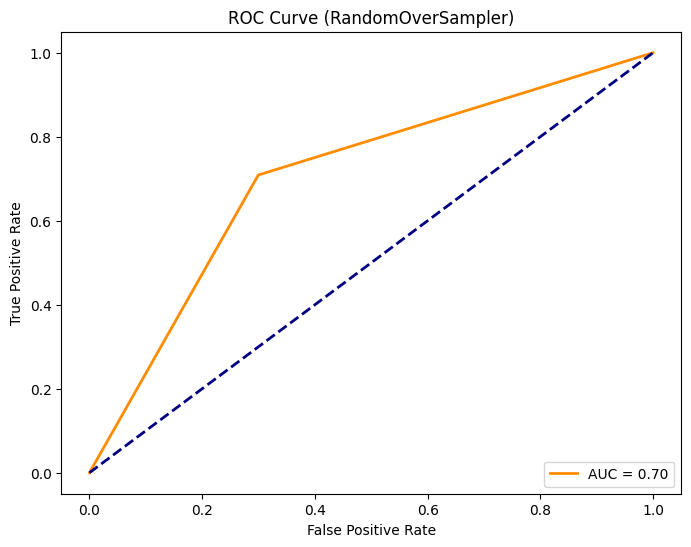

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.5870
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6438 - accuracy: 0.6761
Epoch 3/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.7162
Epoch 4/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.7348
Epoch 5/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.7452
Epoch 6/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7452
Epoch 7/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7479
Epoch 8/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.7507
Epoch 9/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7521
Epoch 10/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7590
Epoch 11/30
46/46 [===========

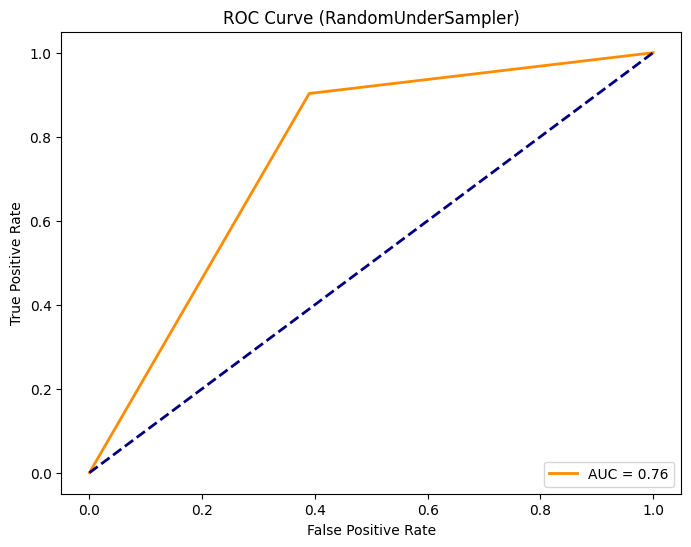

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


337/337 [==============================] - 1s 1ms/step - loss: 0.6068 - accuracy: 0.6798
Epoch 2/30
337/337 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.9320
Epoch 3/30
337/337 [==============================] - 0s 997us/step - loss: 0.2343 - accuracy: 0.9327
Epoch 4/30
337/337 [==============================] - 0s 1ms/step - loss: 0.2154 - accuracy: 0.9327
Epoch 5/30
337/337 [==============================] - 0s 1ms/step - loss: 0.2070 - accuracy: 0.9327
Epoch 6/30
337/337 [==============================] - 0s 979us/step - loss: 0.2025 - accuracy: 0.9327
Epoch 7/30
337/337 [==============================] - 0s 1ms/step - loss: 0.1996 - accuracy: 0.9327
Epoch 8/30
337/337 [==============================] - 0s 985us/step - loss: 0.1977 - accuracy: 0.9327
Epoch 9/30
337/337 [==============================] - 0s 997us/step - loss: 0.1964 - accuracy: 0.9327
Epoch 10/30
337/337 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9327
Ep

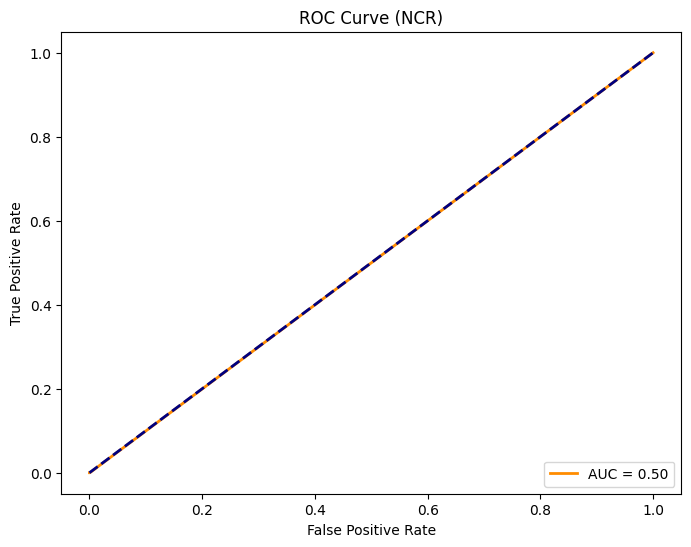

In [8]:
results = {}
scaler = StandardScaler()
#No Sampling
metrics = train_ann(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote, y_smote = smote(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_smote, X_test_scaled, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

# ros = RandomOverSampler(random_state=42)
# X_over, y_over = ros.fit_resample(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_over, X_test_scaled, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]


# rus = RandomUnderSampler(random_state=42)
# X_under, y_under = rus.fit_resample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_under)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_under, X_test_scaled, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

# X_ncr, y_ncr = ncr(X_train, y_train)
# metrics = train_ann(X_ncr, y_ncr, X_test, y_test,'NCR')
# results[metrics[0]] = metrics[1:]
X_ncr, y_ncr = ncr(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_ncr)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_ncr, X_test_scaled, y_test,'NCR')
results[metrics[0]] = metrics[1:]

In [9]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['F1 Score', 'Precision', 'Recall', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
SMOTE,69.90,16.67,26.92,74.64
RandomUnderSampler,90.29,14.22,24.57,62.97
RandomOverSampler,70.87,14.48,24.05,70.10
No Sampling,0.00,0.00,0.00,93.32
NCR,0.00,0.00,0.00,93.26
